# Assignment 3: Model project


In this project we look at the Malthusian model. First we introduce the basic Malthusian model as given in the lacture note of Dalgaard (2014). This model shows that changes in income per capita is only transitory and will result in changes in population size. We show how the population level depends on different parameters in this model and, importantly, we show that allowing for technological growth does not change the conclusion of the model. 

Next, we move on to show the microfoundations fo how the model works and how taxes affect the population size and income per capita. Using a quantity/quality approach we offer an explanation for how humanity escaped the malthusian trap following the logic of Galor & Weil (2000). 

Lastly, we describe how the Brent-Method used for the numerical solution works.

Imports and set magics:

In [1]:
# importing relevant modules 
from types import SimpleNamespace
from scipy import optimize
import sympy as sm
import math
import ipywidgets as widgets
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# import pyfile with model solver
from modelproject import MalthusModelClass 
from modelproject import MalthusMicroModelClass
from modelproject import QualityQuantity

**Table of contents**<a id='toc0_'></a>    
- 1. [The simpel Malthusian model](#toc1)     
- 2. [The Malthusian model with technological growth](#toc2_)
- 3. [Microfoundations 1 and a tax experiment:](#toc3_)    
- 4. [Microfoundations 2: Quantity/quality tradeoff:](#toc4_)
- 5. [The brentq root finder:](#toc5_)
- 6. [Conclusion](#toc6_)


## 1. <a id='toc1'></a>[The simple Malthusian model](#toc0_)

**<span style="font-size:1.5em;">1.1: The Malthusian Model</span>**

The Malthusian model has two important assumptions: 1) diminishing marginal product to labor and 2) a positive connection between income per capita and the birth rate. To incoorporate diminishing returns we assume a Cobb-Douglas production function.

\begin{align*}
Y_t=L_t^{(1-\alpha)} \cdot (A \cdot X)^\alpha, \quad \text{where} \quad 0<\alpha<1 
\end{align*}

$Y_t$ is output, $A$ is the level of technology, $L_t$ is labor input, and $X$ is land. We can write income per capita as follows:

\begin{align*}
y_t=\bigg(\frac{A\cdot X}{L_t}\bigg)^\alpha 
\end{align*}

To capture the positive connection between income per capita and the the birth rate assume that $n_t = \eta y_t$

The size of the labor force is assumed to be equal to the population size. This means that the labor force dynamics is given by the following equation:

\begin{align*}
L_{t+1}=n_t\cdot L_t+(1+\mu)\cdot L_t, \quad \text{where $L_0$ is given}  
\end{align*}

In this way $\mu$ is mortality.

Combining the above equations, we obtain
\begin{alignat*}{5}
L_{t+1}&&=\eta \cdot L_t^{(1-\alpha)} \cdot (A\cdot X)^\alpha+(1-\mu)\cdot L_t \\
\end{alignat*}

Steady state level of $L$ is given by:
$$
L^\ast=\bigg(\frac{\eta}{\mu}\bigg)^{\frac{1}{\alpha}} AX \\
$$

Inserting this in $y_t$ gives:
$$
y^\ast=\frac{\mu}{\eta}
$$
****

Doing comparative statics on the steady state for the labor force shows that the size of the labor force depends positively on the level of technology, $A$, the amount of land, $X$ and the the preferences for having children, $\eta$. It depends negatively on mortality, $\mu$. 

This is illustrated in the plot below where the steady state size of the labor force/population changes for given parameters. 

In [2]:
model = MalthusModelClass() # call class
model.plot_widget()

interactive(children=(FloatSlider(value=0.3333333333333333, description='alpha', max=0.65, min=0.01, step=0.02…

Furhter, we can solve the steady state income numerically as well as confirm the steady state from the plot: 

In [3]:
# Find steady state income
print(f'The income per capita in steady state for given parameter values is {model.find_ss_y():.3f}')

# Find steady state population 
print(f'The population in steady state for given parameter values is {model.find_ss_l():.3f}')

# Find steady state populaiton density 
print(f'The population density in steady state for given parameter values is {model.find_ss_l()/model.par.X:.3f}')


The income per capita in steady state for given parameter values is 1.000
The population in steady state for given parameter values is 36.000
The population density in steady state for given parameter values is 9.000


The plot shows that the law of motion for the population intersects with the 45 degree line exactly at this value, such that the population/labor force will not increase any more.

## 2. <a id='toc2_'></a>[The Malthusian model with technological growth](#toc0_)

We can extend basic Malthus model to allow for technological growth. 

$$ \frac{A_{t+1}}{A_t}=g > 1 $$


Define: $l_t=\frac{L_t}{A_T}$ and use that $\frac{L_{t+1}}{A_t}=\frac{L_{t+1}}{A_{t+1}}\frac{A_{t+1}}{A_t}=l_{t+1}g$. This gives the following law of motion for the population size:


$$
l_{t+1} =\eta g^{-1} l_t^{1-\alpha} X^\alpha + g^{-1}(1-\mu)l_t, \ \ l_0 \ \text{given} 
$$

The following plot shows how the steady state depends on given parameters:

In [4]:
model = MalthusModelClass() # call class
model.plot_widget_tech()

interactive(children=(FloatSlider(value=0.3333333333333333, description='alpha', max=0.65, min=0.01, step=0.02…

To better understand the dynamics we can plot the development in the actual labor force/population:

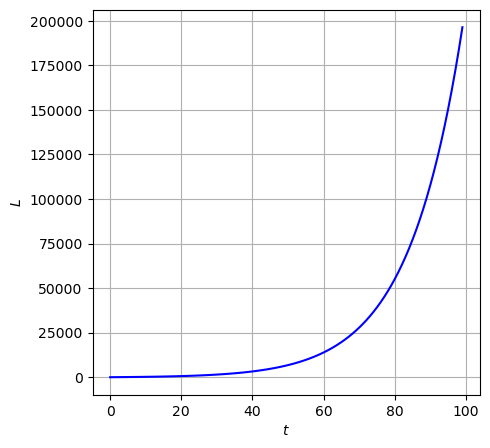

In [5]:
model = MalthusModelClass()

model.simulate_malthus_l_tech(100)

In the steady state we have that 

$$
y^*=\left[(A X / L)^*\right]^\alpha=\frac{g+\mu-1}{\eta}> \frac{\mu}{\eta}
$$

This shows that the steady state income per capita is sligthly higher when there is technological growth. The difference is  very little, considering that we have allowed for exponential growth in technology.

In [6]:
model = MalthusModelClass()

#Find steady state population 
print(f'The transformed population in steady state for given parameter values is {model.find_ss_lx_tech():.3f}')

# Find steady state technology adjusted populaiton
print(f'The income per capita in steady state for given parameter values is {model.find_ss_y_tech():.3f}')


The transformed population in steady state for given parameter values is 0.952
The income per capita in steady state for given parameter values is 1.050


In [7]:
#Calculate differenc in income per capita w/wo technological growth
print(f'The difference in income per capita w/wo technological growth is {model.find_ss_y_tech()-model.find_ss_y():.3f}')

The difference in income per capita w/wo technological growth is 0.050


This shows that income per capita stagnates a level that is a little higher than the level without exponential growth. Exponential growth in technology is not able to create permanent growth in income per capita. 

## 3. <a id='toc3_'></a>[Microfoundations 1 and a tax experiment:](#toc0_)

For simplicity assume that all agents receive the average income $y_t$. The budget constraint is then
$$
c_t+\delta n_t=y_t(1-\tau)
$$
where $c_t$ is consumpion and $\delta$ is the relative price of children.

The utility function is then given as:
$$
u_t=\beta \log(c_t)+(1-\beta)\log(n_t)
$$
By substitution of the budget constraint, the agents solves the following problem in when choosing between consumption of goods and expenses children.
$$
\max_{n_t} \quad u_t=\beta(y_t(1-\tau)-\delta n_t)+(1-\beta)\log(n_t)
$$

We can use **Sympy** to solve the maximization problem:

In [8]:
model = MalthusMicroModelClass() # call class
model.maximization()

We set up the utility function that we want to maximize:


Eq(\max_{n_t}u_t, beta*log(-delta*n + y*(1 - tau)) + (1 - beta)*log(n))

Next we find the first order condition with respect to n


Eq(\frac{\partial\\u_t}{\partial\\n_t}, -beta*delta/(-delta*n + y*(1 - tau)) + (1 - beta)/n)

Finally, we solve the first-order condition and find n*


Eq(n^{\ast}, y*(beta*tau - beta - tau + 1)/delta)

We can the solve the housheold problem numerically for given income, $y=100$


In [9]:
model = MalthusMicroModelClass() # call class
model.solve() # solving model

Optimal consumption: 71.99
Optimal number of off spring: 9.00


Since we now have microfoundations of fertility, we can find a new steady state for the model which means that $L_{t+1}$ must be redefined:

\begin{align*}
L_{t+1}&=n_t\cdot L_t+(1-\mu)\cdot L_t  \\
L_{t+1}&=y\cdot\frac{\beta \tau-\beta-\tau+1}{\delta} \cdot L_t+(1-\mu)\cdot L_t\\
L_{t+1}&=\bigg(\frac{A\cdot X}{L_t}\bigg)^\alpha \cdot\frac{\beta \tau-\beta-\tau+1}{\delta} \cdot L_t+(1-\mu)\cdot L_t\\
L_{t+1}&=\frac{\beta \tau-\beta-\tau+1}{\delta} \cdot (A\cdot X)^\alpha \cdot L_t^{1-\alpha}+(1-\mu)\cdot L_t \\
 \\
L_{t+1}&=\eta \cdot (A\cdot X)^\alpha \cdot L_t^{1-\alpha}+(1-\mu)\cdot L_t, \quad \text{where $\eta$ is defined as } \eta\equiv\frac{\beta \tau-\beta-\tau+1}{\delta} 
\end{align*}

We can then again simulate the law of motion for the labor force and this time experiment with how the tax affects steady state for the labor force: 

In [10]:
model.plot_widget()

interactive(children=(FloatSlider(value=0.1, description='tau', max=0.8, min=0.01, step=0.01), Output()), _dom…

We note that when individuals face tax, it lowers the size of the labor force in the long-run. However, this does not mean that **after-tax** income income increases. The after tax income is given by 

$$
y^d = (1-\tau)y
$$

and is unaffected by the by the tax in steady state. As the plot suggests, a tax will just lower the labor force and the disposable income will be unchanged. Hence, such a tax policy is ineffective in affecting living standards in the Malthusian world. We say that the "deadweight loss" from taxation is zero evaluated in steady state. 

## 4. <a id='toc4_'></a>[Microfoundations 2: Quantity/quality tradeoff:](#toc0_)


Next up, we want to investigate one microfounded theory for how some economies esscaped the Malthusian trap by going through the demograhic transition. The demographic transition refers to a theory that describes the historical shift of birth and death rates in a population as it undergoes industrialization and economic development. It suggests a transition from high birth and death rates to low birth and death rates over time.

The idea that we will implement is the quantity/quality trade-off the parents face. The basic idea is that an increasing need for "quality investments" in children lead to lower fertility. The theory goes back to Becker (1960) and we implement it based on Galor and Weil (2000).

We investigate the quality/quantity tradeoff for parents. This tradeoff emphasizes the balance between how many children the parents decide to have and how much money they are able to spend on each child. Letting technological growth increase the investments in children can show how the demographic transition happened.

Assume the following preferences for the households:

$$
u(c,n) = (1-\gamma)\log(c) + \gamma[\log(n)+\beta \log(h)],
$$

where $ \gamma,\beta  \in (0.1)$ and $h$ is humancapital. Assume for simplicity that $h(e,g)=\frac{e}{e+g}$. 

The budget constraint is: $yn(\tau^q+\tau^ee)+c = y$, where $\tau^q$ is the basic investements in humancapital (food and cloth) and $\tau^e$ is additional investments in humancapital (schooling, healthy diet). 

In [11]:
model = QualityQuantity() # call class
model.solve()

Optimal consumption: 50.00
Optimal number of off spring: 0.64
Optimal education investments: 0.470


Note that the numerical optimizaiton here is quite sensitive to given parameters. The key result however is that 

$$\frac{\partial n}{\partial g} <0, \ \ \frac{\partial e}{\partial g} >0 $$  

Meaning that when technology grows faster it drives down fertility $n$ and drives up the education investments.

This is according to Ashraf & Galor (2011) one of the key explanations of the demographic transition.


## 5. <a id='toc5_'></a>[The brentq root finder](#toc0_)

In solving the Malthus model numerically, we have chosen to use the Brent-Method. Specifically we have been using the brentq from SciPy, which is based on the Brent Method. 

Here we provide a description how it combines the bisection method we have seen in the course with quadratic interpolation.




The **Brent-Method** is considered one of the best root-finding algorithms.

**Input**: A function f(x) to find the root of, and an initial bracket [a, b] containing the root.

**Output**: An approximation of the root.

Basically, Brent's method that is used in the **brenq** SciPy method combines the bisection method that we have seen in the lectures with secant methods and quadratic interpolation methods. The method iteratively narrows down the interval containing the root by selecting trial point based on the behaviour of the function. The algorithm chooses the interpolation method that gives the most accurate estimate. This is what makes it very robust in root-finding.   

For a good description of Brent's method implemented as an algorithm, se here: https://mathsfromnothing.au/brents-method/?i=1


## 6. <a id='toc6_'></a>[Conclusion:](#toc0_)

In this project we have looked at some of the key characteristics of a Malthusian economy and the resulting macro dynamics. We have shown how the assumptions about how fertility is related to income is crucial. Further we have shown that even when we allow for technological growth we have stagnation of income and the gains only result in a larger labor force. By implementing a microfoundation we have shown that income taxes only result in different labor force size and only slightly different income levels. Lastly, we have shown the the dmeographic transition and thus the escape from the Malthusian trap can be motivated by the quantity/quality tradeoff hypothesis as a microfoundations in the Malthus model. 